In [5]:
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(scales)
library(repr)
library(stargazer)
library(gridExtra)
options(repr.plot.width=10, repr.plot.height=10)
source('~/covid_mobility/paper_code/utils/adjacency_and_cluster_robust_inference.R')
source('~/covid_mobility/paper_code/utils/residualizer+genAlters.R')
source('../utils/labels_and_colors.r')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/social_adj_matrix.RData')
panel = readRDS('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_v2.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/conley_selector_matrix.Rdata')

In [ ]:
######## Main DVs
##### RELATIVE 
# DV           CORRESPONDING PEER VARAIBLE
# ash_rnstu.r  alter_ash_rnstu.r
# fb_btvrc.r   alter_fb_btvrc.r
# ash_nhd.r    alter_ash_nhd.r
# log_mcbgv.r  alter_log_mcgbv.r
##### NON RELATIVE 
# DV           CORRESPONDING PEER VARAIBLE
# fb_rnstu.r   alter_rnstu.r
# sg_nhd.r     alter_nhd.r
# sg_mcbgv.r   alter_mcgbv.r
#####

In [6]:
### IF YOU NEED TO ADD A VARIABLE/INTERACTION
panel %>%
    mutate(ash_rnstu_Xsh = ash_rnstu * stay_home,
           ash_alter_rnstu = asinh(alter_rnstu),
           ash_alter_nhd   = asinh(alter_nhd),
           log_alter_mcbgv = asinh(alter_mcbgv),
           fb_alter_btvrc = asinh(alter_btvrc)) %>%
    mutate(alter_rnstu_Xsh = weightedAlters(., WM, ash_rnstu_Xsh),   
           alter_rnstu_Xsh.r = panel_residualizer(alter_rnstu_Xsh),
           ash_alter_rnstu.r = panel_residualizer(ash_alter_rnstu),
           ash_alter_nhd.r = panel_residualizer(ash_alter_nhd),
           log_alter_mcbgv.r = panel_residualizer(log_alter_mcbgv),
           fb_alter_btvrc.r = panel_residualizer(fb_alter_btvrc)) -> panel
### NOTE if VAR is generated in a mutate, then weightedAlters(., WM, VAR) cannot be in the same mutate.

[1]	train-rmse:0.258359+0.000216	test-rmse:0.258639+0.001524 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 3 rounds.

[2]	train-rmse:0.139379+0.000261	test-rmse:0.140046+0.001698 
[3]	train-rmse:0.086538+0.000460	test-rmse:0.087683+0.001555 
[4]	train-rmse:0.066738+0.000553	test-rmse:0.068029+0.001308 
[5]	train-rmse:0.060482+0.000636	test-rmse:0.062171+0.001396 
[6]	train-rmse:0.058673+0.000690	test-rmse:0.060435+0.001391 
[7]	train-rmse:0.058015+0.000721	test-rmse:0.060118+0.001352 
[8]	train-rmse:0.057679+0.000709	test-rmse:0.060005+0.001439 
[9]	train-rmse:0.057388+0.000764	test-rmse:0.059879+0.001423 
[10]	train-rmse:0.057157+0.000845	test-rmse:0.059887+0.001275 
[11]	train-rmse:0.057057+0.000822	test-rmse:0.059820+0.001351 
[12]	train-rmse:0.056972+0.000819	test-rmse:0.059790+0.001307 
[13]	train-rmse:0.056769+0.000810	test-rmse:0.059794+0.001323 
[14]	train-rmse:0.056562+0.000800	test-rmse:0.059759+0.0013

In [9]:
m1 <- felm(ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_rnstu.r ~ iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m1 <- summarize.felm.fit.with.adj(m1, conley.selector.matrix, panel$state_abbv)
sum.m1$ct
#sum.m1$wt

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                           Estimate Std. Error t value  Pr(>|t|)    
shiftshare_11.r          -2.5200010  0.6357165 -3.9640 0.0002346 ***
shiftshare_21.r           3.6430611  1.4595630  2.4960 0.0159035 *  
shiftshare_22.r          -0.6326123  0.1560574 -4.0537 0.0001761 ***
shiftshare_23.r           1.4675163  0.3051734  4.8088 1.434e-05 ***
shiftshare_31.r          -0.6355882  0.1165571 -5.4530 1.529e-06 ***
shiftshare_32.r          -0.4547528  1.1096149 -0.4098 0.6836817    
shiftshare_33.r          -0.9413820  0.2454292 -3.8357 0.0003521 ***
shiftshare_42.r          -1.0087834  0.2059522 -4.8981 1.056e-05 ***
shiftshare_44.r          -0.0572649  0.0193355 -2.9617 0.0046718 ** 
shiftshare_45.r          -0.0428922  0.0150130 -2.8570 0.0062159 ** 
shiftshare_48.r           0.1142475  0.1291023  0.8849 0.3804259    
shiftshare_49.r          -0.0669412  0.0864823 -0.7740 0.4425488    
shiftshare_51.r           0.4953611  0.0777046  6.3749 5.702e-08 ***
shiftsha

In [23]:
saveRDS(sum.m1, file = "~/covid_mobility/paper_code/output/models/iv_ash_rnstu.rds")

In [10]:
# fit <- felm(sg_mcbgv.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
#                         shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
#                         shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
#                         shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
#                         shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
#                         ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
#                         county_fips + ds | 
#            (alter_mcbgv.r ~ iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
#                             iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
#                             iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
#                             iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
#                             iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
#                             iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
#                             iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
#                             iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
#                             iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
#                             iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
#                             iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
#                             iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
#                             iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
#                             iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
#             state_abbv, panel, weights = panel$n, keepCX = T)
# summary(fit)

In [11]:
# fit2 <- felm(sg_mcbgv.r ~ ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
#                         county_fips + ds | 
#            (alter_mcbgv.r ~ iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
#                             iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
#                             iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
#                             iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
#                             iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
#                             iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
#                             iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
#                             iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
#                             iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
#                             iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
#                             iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
#                             iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
#                             iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
#                             iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
#             state_abbv, panel, weights = panel$n, keepCX = T)
# summary(fit2)

In [12]:
m2 <- felm(fb_btvrc.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (fb_alter_btvrc.r ~ 
                            iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) |
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m2 <- summarize.felm.fit.with.adj(m2, conley.selector.matrix, panel$state_abbv)
sum.m2$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
shiftshare_11.r          0.0118450  1.7381171  0.0068 0.9945897    
shiftshare_21.r          3.5461508  0.7011408  5.0577 6.089e-06 ***
shiftshare_22.r         -1.0183302  0.3501026 -2.9087 0.0054026 ** 
shiftshare_23.r          2.5403648  0.7943886  3.1979 0.0024026 ** 
shiftshare_31.r         -1.2701120  0.3103796 -4.0921 0.0001556 ***
shiftshare_32.r          5.2571596  2.8817945  1.8243 0.0740904 .  
shiftshare_33.r          0.0305511  0.4815715  0.0634 0.9496688    
shiftshare_42.r         -2.4157590  0.5252498 -4.5993 2.918e-05 ***
shiftshare_44.r          0.0385622  0.0415473  0.9282 0.3577878    
shiftshare_45.r         -0.1244476  0.0416313 -2.9893 0.0043284 ** 
shiftshare_48.r          0.2930018  0.2447183  1.1973 0.2368344    
shiftshare_49.r          0.6608097  0.3059727  2.1597 0.0356167 *  
shiftshare_51.r          1.3315942  0.2109062  6.3137 7.106e-08 ***
shiftshare_52.r       

In [24]:
saveRDS(sum.m2, file = "~/covid_mobility/paper_code/output/models/iv_fb_btvrc.rds")

In [13]:
m3 <- felm(ash_nhd.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (ash_alter_nhd.r ~ 
             iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m3 <- summarize.felm.fit.with.adj(m3, conley.selector.matrix, panel$state_abbv)
sum.m3$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                         Estimate Std. Error  t value  Pr(>|t|)    
shiftshare_11.r         0.0889226  1.2741024   0.0698 0.9446373    
shiftshare_21.r         6.6430119  2.3207015   2.8625 0.0061243 ** 
shiftshare_22.r        -1.2551283  0.2405923  -5.2168 3.501e-06 ***
shiftshare_23.r         3.9304586  0.6680016   5.8839 3.314e-07 ***
shiftshare_31.r        -1.2053708  0.1742190  -6.9187 8.043e-09 ***
shiftshare_32.r        10.2506651  1.8722685   5.4750 1.415e-06 ***
shiftshare_33.r        -1.0711084  0.3778924  -2.8344 0.0066060 ** 
shiftshare_42.r        -1.5643201  0.2884940  -5.4224 1.703e-06 ***
shiftshare_44.r        -0.0801920  0.0290979  -2.7559 0.0081451 ** 
shiftshare_45.r        -0.1931604  0.0362446  -5.3294 2.361e-06 ***
shiftshare_48.r         0.0357074  0.1757163   0.2032 0.8397954    
shiftshare_49.r         0.3980481  0.1542989   2.5797 0.0128742 *  
shiftshare_51.r         0.6941309  0.1320078   5.2583 3.029e-06 ***
shiftshare_52.r       

In [25]:
saveRDS(sum.m3, file = "~/covid_mobility/paper_code/output/models/iv_ash_nhd.rds")

In [14]:
m4 <- felm(log_mcbgv.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (log_alter_mcbgv.r ~ 
             iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m4 <- summarize.felm.fit.with.adj(m4, conley.selector.matrix, panel$state_abbv)
sum.m4$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                           Estimate Std. Error  t value  Pr(>|t|)    
shiftshare_11.r           3.5017197  2.6880819   1.3027 0.1986510    
shiftshare_21.r           1.7612325  1.1066021   1.5916 0.1177852    
shiftshare_22.r          -2.0048509  0.3423520  -5.8561 3.660e-07 ***
shiftshare_23.r           1.9053258  0.6921275   2.7529 0.0082119 ** 
shiftshare_31.r          -1.2273382  0.3894166  -3.1517 0.0027418 ** 
shiftshare_32.r           7.3521537  3.3666311   2.1838 0.0336933 *  
shiftshare_33.r          -4.5497254  0.5444359  -8.3568 4.692e-11 ***
shiftshare_42.r          -2.1515809  0.5216138  -4.1249 0.0001400 ***
shiftshare_44.r          -0.3570884  0.0571651  -6.2466 9.043e-08 ***
shiftshare_45.r          -0.2383284  0.0681585  -3.4967 0.0009980 ***
shiftshare_48.r           0.1575409  0.2967989   0.5308 0.5979072    
shiftshare_49.r           1.2631530  0.3208794   3.9365 0.0002561 ***
shiftshare_51.r           1.0077333  0.2704854   3.7256 0.000496

In [26]:
saveRDS(sum.m4, file = "~/covid_mobility/paper_code/output/models/iv_log_mcbgv.rds")

In [15]:
# Non relative 

m5 <- felm(fb_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (alter_rnstu.r ~ 
             iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m5 <- summarize.felm.fit.with.adj(m5, conley.selector.matrix, panel$state_abbv)
sum.m5$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
shiftshare_11.r      -2.91306646  0.76084184 -3.8287 0.0003598 ***
shiftshare_21.r       4.20271933  1.65494479  2.5395 0.0142572 *  
shiftshare_22.r      -0.77036104  0.19145178 -4.0238 0.0001939 ***
shiftshare_23.r       1.85695742  0.37549605  4.9453 8.975e-06 ***
shiftshare_31.r      -0.75206785  0.14546525 -5.1701 4.121e-06 ***
shiftshare_32.r      -0.05025630  1.35291699 -0.0371 0.9705160    
shiftshare_33.r      -1.07918455  0.29893782 -3.6101 0.0007079 ***
shiftshare_42.r      -1.23951996  0.25256544 -4.9077 1.021e-05 ***
shiftshare_44.r      -0.07187551  0.02371548 -3.0307 0.0038571 ** 
shiftshare_45.r      -0.05626012  0.01844472 -3.0502 0.0036529 ** 
shiftshare_48.r       0.17079331  0.15956981  1.0703 0.2896079    
shiftshare_49.r      -0.09587333  0.10691356 -0.8967 0.3741568    
shiftshare_51.r       0.67172690  0.09789181  6.8619 9.869e-09 ***
shiftshare_52.r      -0.08657045  0.

In [27]:
saveRDS(sum.m5, file = "~/covid_mobility/paper_code/output/models/iv_fb_rnstu_Supplementary.rds")

In [16]:
m6 <- felm(sg_nhd.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (alter_nhd.r ~ 
             iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m6 <- summarize.felm.fit.with.adj(m6, conley.selector.matrix, panel$state_abbv)
sum.m6$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                     Estimate Std. Error  t value  Pr(>|t|)    
shiftshare_11.r     0.4124264  1.5558139   0.2651  0.792032    
shiftshare_21.r     8.0594243  2.8064909   2.8717  0.005974 ** 
shiftshare_22.r    -1.4214577  0.2816990  -5.0460 6.340e-06 ***
shiftshare_23.r     4.4154402  0.7526107   5.8668 3.522e-07 ***
shiftshare_31.r    -1.3616514  0.2025937  -6.7211 1.639e-08 ***
shiftshare_32.r    12.1621773  2.2069447   5.5109 1.247e-06 ***
shiftshare_33.r    -1.2228426  0.4344734  -2.8145  0.006968 ** 
shiftshare_42.r    -1.8288184  0.3434438  -5.3249 2.398e-06 ***
shiftshare_44.r    -0.0907700  0.0341560  -2.6575  0.010541 *  
shiftshare_45.r    -0.2179064  0.0431350  -5.0517 6.215e-06 ***
shiftshare_48.r     0.0672724  0.2052575   0.3277  0.744472    
shiftshare_49.r     0.4869298  0.1851613   2.6298  0.011325 *  
shiftshare_51.r     0.8079331  0.1568877   5.1498 4.423e-06 ***
shiftshare_52.r     0.1332671  0.1164495   1.1444  0.257899    
shiftshare_53.

In [28]:
saveRDS(sum.m6, file = "~/covid_mobility/paper_code/output/models/iv_sg_nhd_Supplementary.rds")

In [17]:
m7 <- felm(sg_mcbgv.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds | 
            (alter_mcbgv.r ~ 
             iv001 + iv002 + iv003 + iv004 + iv005 + iv006 + iv007 + iv008 + iv009 + iv010 +
                            iv011 + iv012 + iv013 + iv014 + iv015 + iv016 + iv017 + iv018 + iv019 + iv020 +
                            iv021 + iv022 + iv023 + iv024 + iv025 + iv026 + iv027 + iv028 + iv029 + iv030 +
                            iv031 + iv032 + iv033 + iv034 + iv035 + iv036 + iv037 + iv038 + iv039 + iv040 +
                            iv041 + iv042 + iv043 + iv044 + iv045 + iv046 + iv047 + iv048 + iv049 + iv050 +
                            iv051 + iv052 + iv053 + iv054 + iv055 + iv056 + iv057 + iv058 + iv059 + iv060 +
                            iv061 + iv062 + iv063 + iv064 + iv065 + iv066 + iv067 + iv068 + iv069 + iv070 +
                            iv071 + iv072 + iv073 + iv074 + iv075 + iv076 + iv077 + iv078 + iv079 + iv080 +
                            iv081 + iv082 + iv083 + iv084 + iv085 + iv086 + iv087 + iv088 + iv089 + iv090 +
                            iv091 + iv092 + iv093 + iv094 + iv095 + iv096 + iv097 + iv098 + iv099 + iv100 +
                            iv101 + iv102 + iv103 + iv104 + iv105 + iv106 + iv107 + iv108 + iv109 + iv110 +
                            iv111 + iv112 + iv113 + iv114 + iv115 + iv116 + iv117 + iv118 + iv119 + iv120 +
                            iv121 + iv122 + iv123 + iv124 + iv125 + iv126 + iv127 + iv128 + iv129 + iv130 +
                            iv131 + iv132 + iv133 + iv134 + iv135 + iv136 + iv137 + iv138 + iv139 + iv140) |
           state_abbv, panel, weights = panel$n, keepCX = T)

# summary(fit)
# print(condfstat(fit))
sum.m7 <- summarize.felm.fit.with.adj(m7, conley.selector.matrix, panel$state_abbv)
sum.m7$ct

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                       Estimate Std. Error  t value  Pr(>|t|)    
shiftshare_11.r      -1.0430384  6.2424002  -0.1671 0.8679737    
shiftshare_21.r       5.2514820  3.5430599   1.4822 0.1445658    
shiftshare_22.r      -3.9859486  0.7117720  -5.6000 9.094e-07 ***
shiftshare_23.r       2.7527901  1.3747307   2.0024 0.0506776 .  
shiftshare_31.r      -2.9226421  0.8140167  -3.5904 0.0007516 ***
shiftshare_32.r      19.7132665  8.1608387   2.4156 0.0194058 *  
shiftshare_33.r      -9.2488639  1.3643688  -6.7789 1.331e-08 ***
shiftshare_42.r      -4.2678728  1.0663748  -4.0022 0.0002077 ***
shiftshare_44.r      -0.5537870  0.1272910  -4.3506 6.692e-05 ***
shiftshare_45.r      -0.1390035  0.1433154  -0.9699 0.3367583    
shiftshare_48.r       0.4583207  0.6843479   0.6697 0.5061182    
shiftshare_49.r       0.0863396  0.5776799   0.1495 0.8817925    
shiftshare_51.r       1.5176646  0.5762526   2.6337 0.0112111 *  
shiftshare_52.r       0.5388764  0.4881793   1.103

In [29]:
saveRDS(sum.m7, file = "~/covid_mobility/paper_code/output/models/iv_sg_mcbgv_Supplementary.rds")

In [30]:
# generate function that calculates the upper and lower bounds
# multiplier is applied to peer effects because it's too large compared to other coefficients
generate_plot_df = function(table, multiplier){
    df1 = data.frame(coef_name = row.names(table),coef_val = table[,1], error = table[,2]) 
    df1[nrow(df1), c('coef_val', 'error')] = df1[nrow(df1), c('coef_val', 'error')]/multiplier
    df1 %>% mutate(lb = coef_val - 1.96*error, ub = coef_val + 1.96*error) -> df1
    return(df1)
}

In [31]:
outcome_list = list(generate_plot_df(sum.m1$ct, 100),
generate_plot_df(sum.m2$ct, 100),
generate_plot_df(sum.m3$ct, 100),
generate_plot_df(sum.m4$ct, 100),
generate_plot_df(sum.m5$ct, 100),
generate_plot_df(sum.m6$ct, 100),
generate_plot_df(sum.m7$ct, 100))
save(outcome_list, file = '/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/iv_results_multiplier100.RData')

In [38]:
library(forcats)

temp_df = outcome_list[[1]] %>% bind_rows(outcome_list[[2]], outcome_list[[3]], outcome_list[[4]], .id = 'id')
temp_df$coef_name2 = temp_df$coef_name
temp_df$coef_name2[grepl('fit', temp_df$coef_name2)] = 'Peer Effect'
temp_df$coef_name2[grepl('stay_home', temp_df$coef_name2)] = 'Shelter-in-place'
temp_df$coef_name2[grepl('ban_gmr', temp_df$coef_name2)] = 'Close gyms/movies/restaurants'
temp_df %>% 
    filter(coef_name2 %in% c('Close gyms/movies/restaurants', 'Shelter-in-place', 'Peer Effect')) %>% 
    mutate(id = as.factor(id), log = c(rep(1, 9), rep(0, 3))) %>% 
    mutate(coef_name2 = fct_relevel(coef_name2, 'Peer Effect','Shelter-in-place', 'Close gyms/movies/restaurants')) %>%
    mutate(outcome = as.character(c(rep('Single Bing\ntile users\n(FB)', 3),
                                    rep('Bing tiles\nvisited per\n device (FB)', 3),
                                  rep('Home device\nfraction\n(Safegraph)', 3),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 3)
                                  )))-> temp_df

# ggplot(temp_df, aes(
#       x= coef_name, y=coef, ymin=lb, ymax=ub
#   )) +
#   geom_pointrange(position = position_dodge(width = .4)) 

plot_df2 <- temp_df %>%
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )
plot_df2$outcome_type[1:9] = c(rep('Leaving home location', 3),
                               rep('Locations visited', 3),
                               rep('Leaving home location', 3))
save(outcome_list, plot_df2, file = '~/covid_mobility/adhoc_analysis/yiqunc/iv_results_multiplier100.RData')
save(outcome_list, plot_df2, file = '/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/iv_results_multiplier100.RData')

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

Warning message:
“Ignoring unknown aesthetics: x”Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“position_dodge requires non-overlapping x intervals”

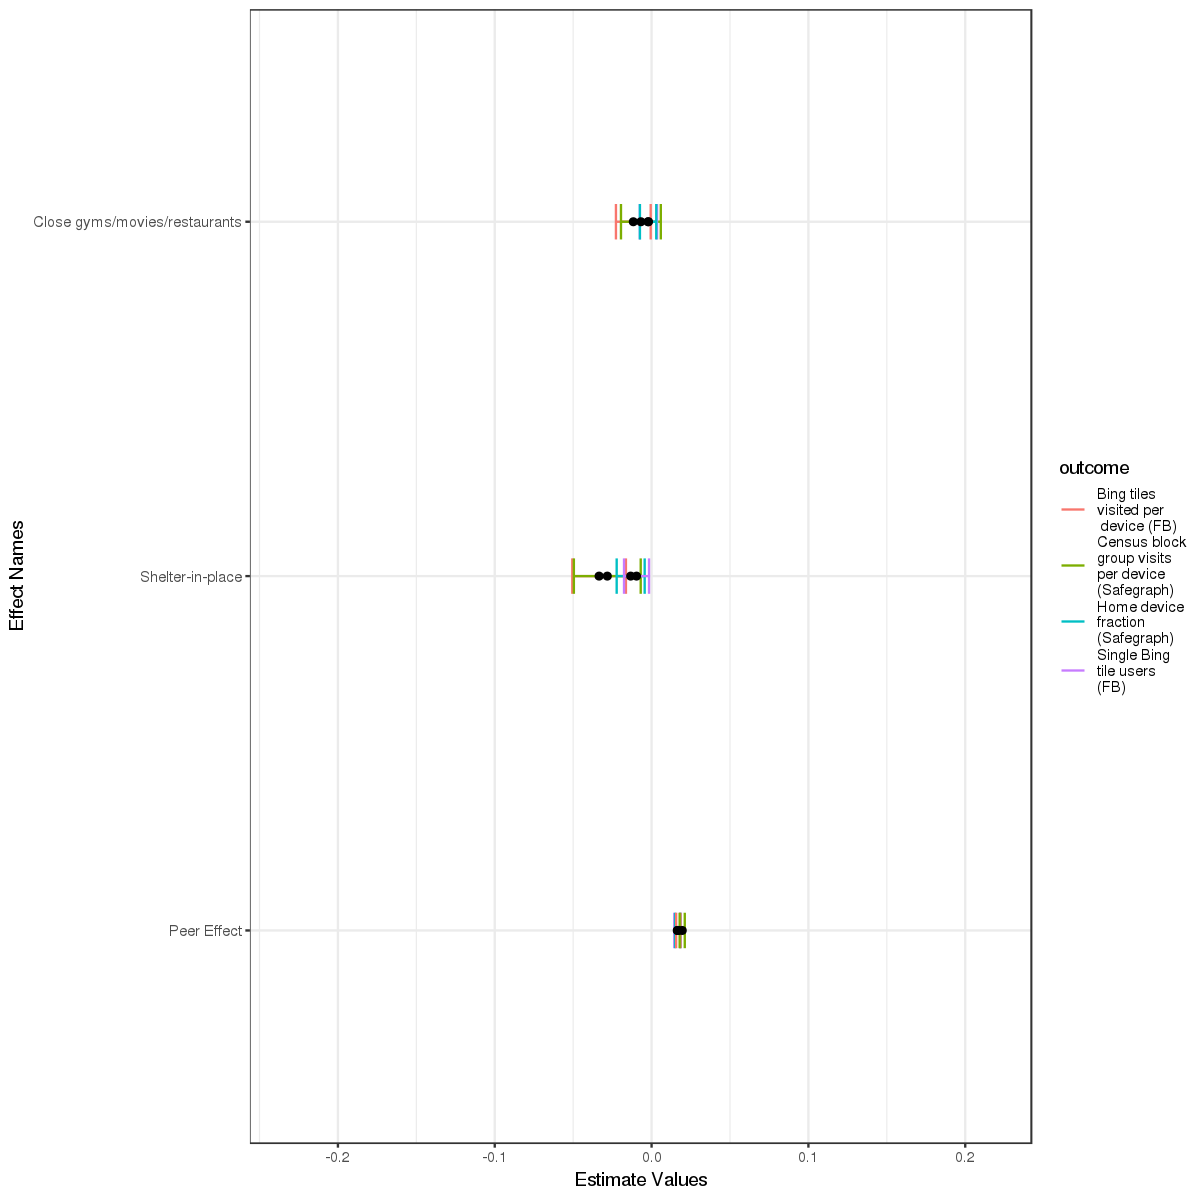

In [37]:
pd <- position_dodge(width = 0.4)
ggplot() + 
geom_errorbarh(data=plot_df2, mapping=aes(y=coef_name2, x=coef_val, xmin=lb, xmax=ub, color = outcome), 
               height=0.1, size=0.5, position = pd) + 
geom_point(data=plot_df2, mapping=aes(y=coef_name2, x=coef_val), position = pd) +
labs(x = 'Estimate Values', y = 'Effect Names')

In [42]:
# diff_in_diff_sp_plot <- plot_df2 %>% 
# #   mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
# #          lb = ifelse(log == 1, exp(lb) - 1, lb),
# #         ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
#   ggplot(., aes(
#       x=coef_val, y=coef_name2, xmin=lb, xmax=ub,
#       color=outcome_source, shape=outcome_source
#   )) +
#   geom_pointrange(position = position_dodge(width = .4)) + 
#   scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
#   scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
#   facet_wrap(outcome_type ~ ., scales='free_x', nrow= 2) +
#   theme(axis.text.x = element_text(hjust = 1, size=13),
#         axis.text.y = element_text(size=13),
#         axis.title = element_text(size=18),
#         #strip.text.x = element_blank(),
#         #strip.text.y = element_text(size=16),
#         panel.background = element_blank(),
#         axis.line = element_line(colour = "black"),
#         #strip.placement.y='top',
#         #strip.background=element_blank(),
# #         strip.text.x.top = element_text(size=16),
#         legend.position="bottom"
#        ) + 
#   geom_vline(xintercept=0, color='red', linetype='dashed') + 
#   scale_x_continuous(labels=percent) +
#   xlab('\nRelative effect size') +
#   ylab('Policy enacted\n')
# diff_in_diff_sp_plot